In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


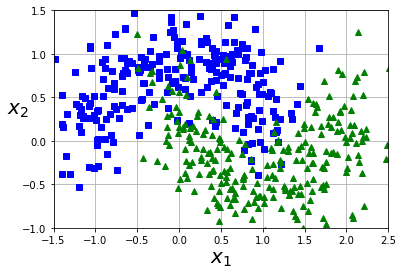

In [2]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=2022)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [3]:
# single tree
tree_clf = DecisionTreeClassifier(random_state=2022)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("Decision tree - accuracy on test set:", accuracy_score(y_test, y_pred_tree))

# bagging of trees
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=2022), 
    n_estimators=500,
    max_samples=100,
    bootstrap=True, 
    random_state=2022
    )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print("Bagging ensemble of decision trees - accuracy on test set:", accuracy_score(y_test, y_pred))

# random forest
rnd_clf = RandomForestClassifier(
    n_estimators=500, 
    max_leaf_nodes=16, 
    random_state=2022
    )
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print("Random forest - accuracy on test set:", accuracy_score(y_test, y_pred_rf))

# AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    learning_rate=0.5, 
    random_state=2022
    )
ada_clf.fit(X_train, y_train)
y_pred_ada = rnd_clf.predict(X_test)
print("AdaBoost - accuracy on test set:", accuracy_score(y_test, y_pred_ada))

# GBDT
gb_clf = GradientBoostingClassifier(
    max_depth=1, 
    n_estimators=200, 
    learning_rate=0.2, 
    random_state=2022
    )
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting - accuracy on test set:", accuracy_score(y_test, y_pred_gb))


Decision tree - accuracy on test set: 0.848
Bagging ensemble of decision trees - accuracy on test set: 0.88
Random forest - accuracy on test set: 0.864
AdaBoost - accuracy on test set: 0.864
Gradient Boosting - accuracy on test set: 0.864


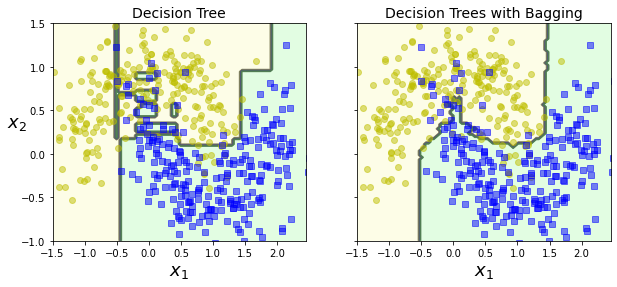

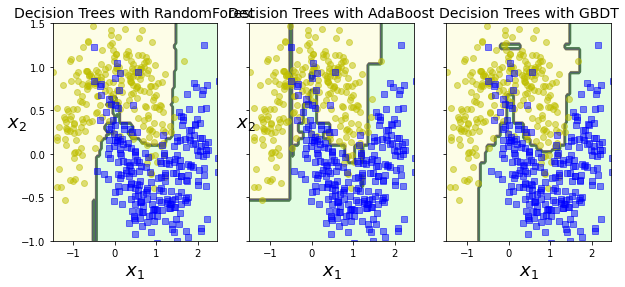

In [4]:

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()
plt.close()

fix, axes = plt.subplots(ncols=3, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Decision Trees with RandomForest", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(ada_clf, X, y)
plt.title("Decision Trees with AdaBoost", fontsize=14)
plt.sca(axes[2])
plot_decision_boundary(gb_clf, X, y)
plt.title("Decision Trees with GBDT", fontsize=14)
plt.ylabel("")
plt.show()
plt.close()